In [36]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [37]:
length = 1024
width = 768

In [38]:
def read_raw(filename, length, width, depth):
    input_raw_image = open(filename,'rb').read()
    input_raw_image = np.frombuffer(input_raw_image, np.uint8).copy()
    img = input_raw_image[0 : length*width*depth]
    img = np.reshape(img, (length,width,depth))
    return img

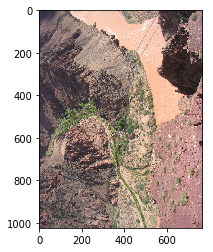

In [39]:
img1 = read_raw('river1.raw', 1024, 768, 3)
plt.imshow(img1)

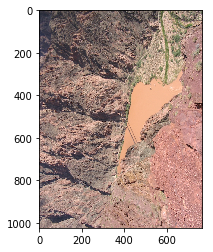

In [40]:
img2 = read_raw('river2.raw', 1024, 768, 3)
plt.imshow(img2)

In [42]:
#Q3- Feature Matching using SIFT

sift=cv2.xfeatures2d.SIFT_create() ## Initiate SIFT

kp1, des1 = sift.detectAndCompute(img1,None)#Keypoints and Descriptors
kp2, des2 = sift.detectAndCompute(img2,None)


# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.75*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   #singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

cv2.imwrite('River_Matching_Image.jpg',img3)
plt.imshow(img3)

TypeError: 'cmap' is an invalid keyword argument for this function

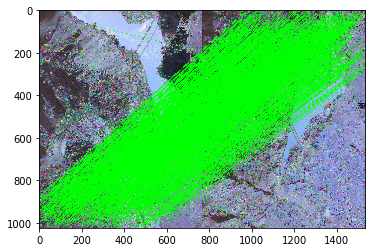

In [43]:
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
cv2.imwrite('River_Matching_Image.jpg',img3)
plt.imshow(img3)

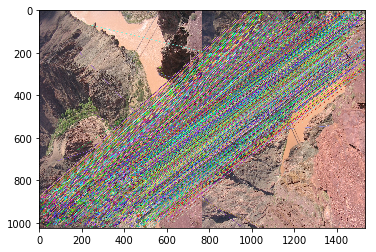

In [44]:
from matplotlib import pyplot as plt

# Initiate SIFT detector
sift=cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.imshow(img3)
plt.show()

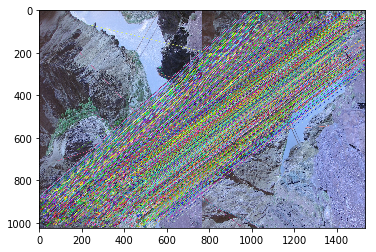

In [45]:
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
cv2.imwrite('River_Matching_Image_BF.jpg',img3)
plt.imshow(img3)

In [46]:
norm1 = [np.linalg.norm(des1[i, :]) for i in range(des1.shape[0])]
norm2 = [np.linalg.norm(des2[i, :]) for i in range(des2.shape[0])]
# print(norm1)
norm1[629]

513.638

In [47]:
norm1[7767]

511.46262

In [48]:
largest_scale_kp1 = np.argmax(norm1)
print(largest_scale_kp1)

629


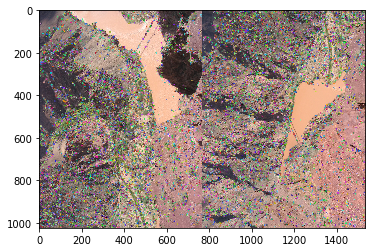

In [28]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch((des1[largest_scale_kp1]), des2, k=1)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
#for i,(m,n) in enumerate(matches):
#    if m.distance < 0.75*n.distance:
#        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   #singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

cv2.imwrite('River_Matching_Image.jpg',img3)
plt.imshow(img3)

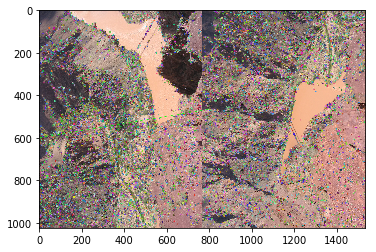

In [56]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch((des1[largest_scale_kp1]).reshape((-1,128)), des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

#ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
   #if m.distance < 0.75*n.distance:
       matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   #singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

#cv2.imwrite('River_Matching_Image.jpg',img3)
plt.imshow(img3)

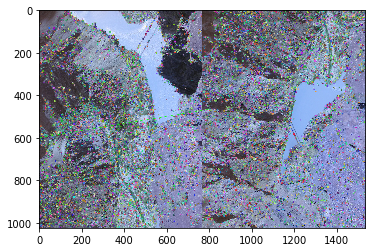

In [57]:
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
cv2.imwrite('River_Matching_Image_FLANN_Final.jpg',img3)
plt.imshow(img3)

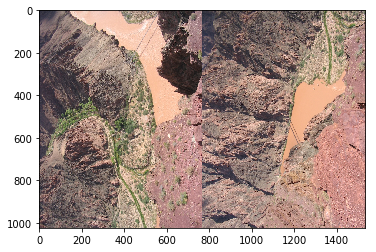

In [54]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch((des1[largest_scale_kp1]).reshape((-1,128)), des2, k=2)

matchesMask = [[0,0] for i in range(len(matches))]

# Apply ratio test
#ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
   #if m.distance < 0.75*n.distance:
       matchesMask[i]=[1,0]
    
draw_params = dict(matchColor = (0,255,0),
                   #singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.imshow(img3)
plt.show()

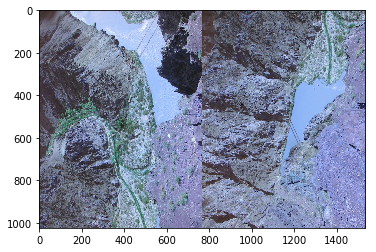

In [55]:
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
cv2.imwrite('River_Matching_Image_BF_Final.jpg',img3)
plt.imshow(img3)